In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

cancer_data = pd.read_csv('cancer_data.csv')
cancer_data = cancer_data.drop(columns = ['Unnamed: 0'])
cancer_data = cancer_data.iloc[:, :12]
cancer_data.head()

,diagnosis,children,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,M,Yes,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,M,No,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,M,Yes,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,M,No,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,M,Yes,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [147]:
#Compute the correlation table
corr_table = cancer_data.corr()
R_square = corr_table**2

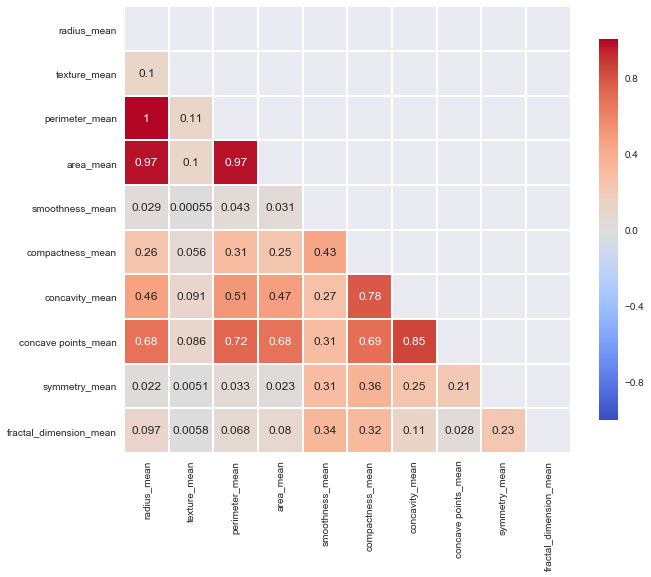

In [148]:
#Heat map of R_Square value
mask = np.zeros_like(R_square, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(R_square, mask=mask, cmap= 'coolwarm', vmax= 1, vmin = -1, center=0,
            square= True, linewidths= 1, cbar_kws={"shrink": .7}, annot = True)


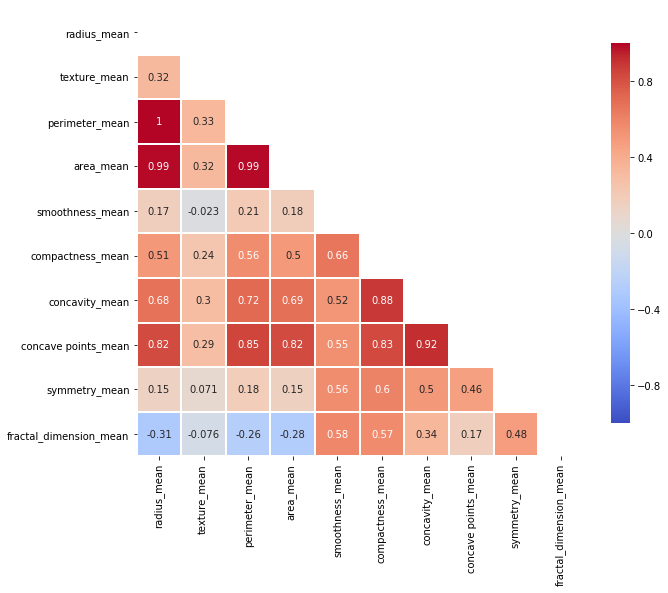

In [102]:
mask = np.zeros_like(corr_table, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_table, mask=mask, cmap= 'coolwarm', vmax= 1, vmin = -1, center=0,
            square= True, linewidths= 1, cbar_kws={"shrink": .7}, annot = True)


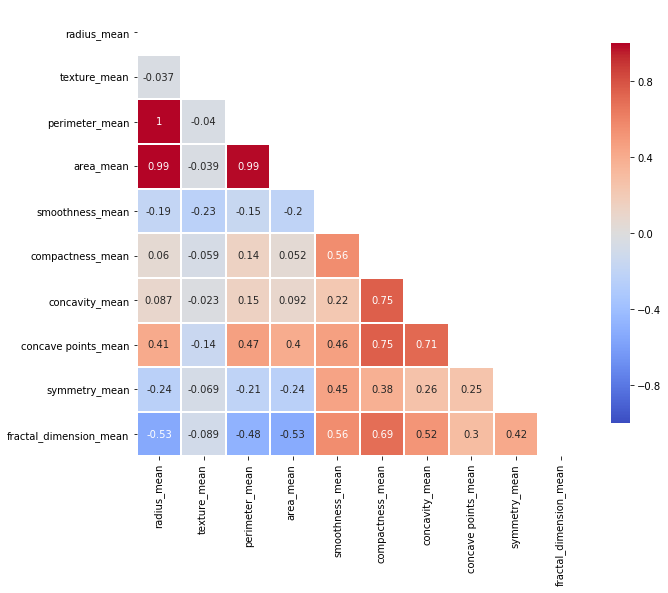

In [99]:
#Correlation plot by Type B diagnosis
byType = cancer_data.groupby(by = 'diagnosis') #Group by type of cancer
corr_TypeB = byType.get_group('B').corr()

mask = np.zeros_like(corr_TypeB, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_TypeB, mask=mask, cmap= 'coolwarm', vmax= 1, vmin = -1, center=0,
            square= True, linewidths= 1, cbar_kws={"shrink": .7}, annot = True)


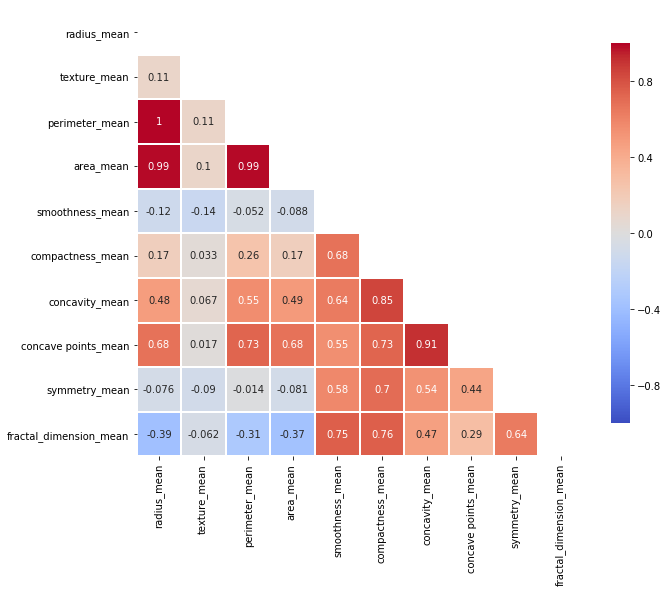

In [100]:
#Correlation plot by Type M diagnosis
byType = cancer_data.groupby(by = 'diagnosis') #Group by type of cancer
corr_TypeM = byType.get_group('M').corr()

mask = np.zeros_like(corr_TypeM, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_TypeM, mask=mask, cmap= 'coolwarm', vmax= 1, vmin = -1, center=0,
            square= True, linewidths= 1, cbar_kws={"shrink": .7}, annot = True)


C:\Users\JFP1141\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\JFP1141\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\JFP1141\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\JFP1141\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' 

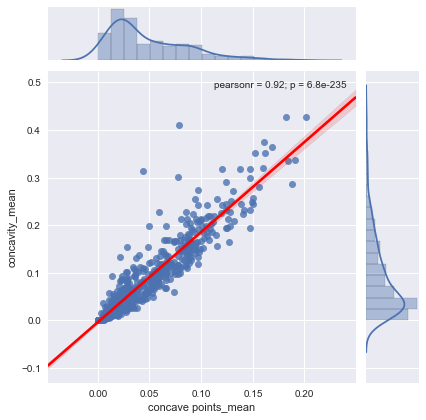

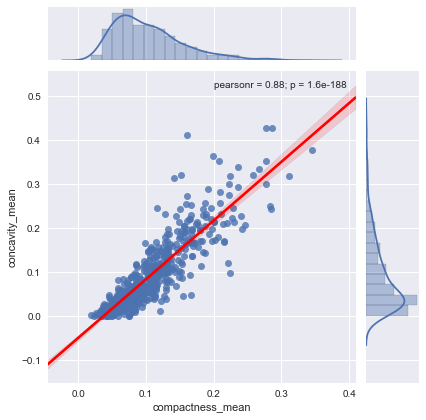

In [145]:
sns.set()
plt.rcParams["patch.force_edgecolor"] = True

#Plot of concavity_mean vs. compactness_mean, hue on diagnosis
import seaborn as sns

sns.jointplot(x='concave points_mean',y='concavity_mean',data= cancer_data, kind='reg',  joint_kws={'line_kws':{'color':'red'}})
sns.jointplot(x='compactness_mean',y='concavity_mean',data= cancer_data, kind='reg', joint_kws={'line_kws':{'color':'red'}})



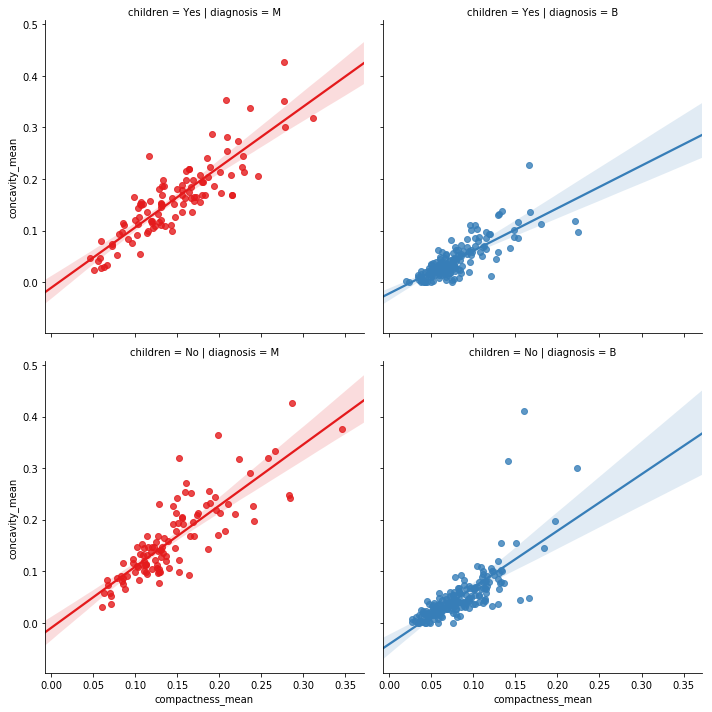

In [3]:
#Plot of concavity_mean vs. compactness_mean, hue on diagnosis, children

sns.lmplot(x='compactness_mean',y='concavity_mean',data= cancer_data, hue = 'diagnosis', palette="Set1", 
         col = "diagnosis", row = "children")

# SIMPLE LINEAR REGRESSION MODEL

## Training and Testing Data


In [4]:
#Predicting the radius_mean based on the compactness_mean, concavity_mean and concave points_mean
# Importing the dataset
X = cancer_data.iloc[:, 7:8].values #compactness_mean
y = cancer_data.iloc[:, 8].values #concavity_mean


In [5]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)


C:\Users\JFP1141\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
regressor.score(X_train, y_train) #R^2 value

0.7814235912486118

In [7]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)


** Create a scatterplot of the real test values versus the predicted values. **

Text(0,0.5,'Predicted Y')

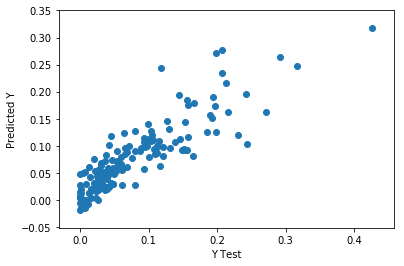

In [8]:
plt.scatter(y_test, y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

### Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

** Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. Refer to the lecture or to Wikipedia for the formulas**

In [9]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.024430609464255494
MSE: 0.0012037775772922475
RMSE: 0.03469549793982279


### Residuals

You should have gotten a very good model with a good fit. Let's quickly explore the residuals to make sure everything was okay with our data. 

**Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().**

C:\Users\JFP1141\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


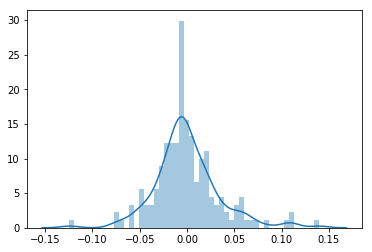

In [10]:
sns.distplot((y_test-y_pred),bins=50);

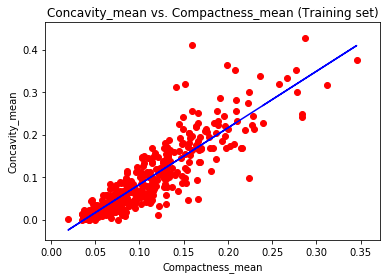

In [11]:
# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Concavity_mean vs. Compactness_mean (Training set)')
plt.xlabel('Compactness_mean')
plt.ylabel('Concavity_mean')
plt.show()

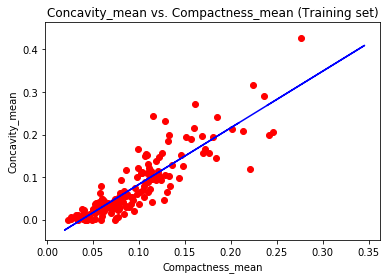

In [12]:
# Visualising the Test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Concavity_mean vs. Compactness_mean (Training set)')
plt.xlabel('Compactness_mean')
plt.ylabel('Concavity_mean')
plt.show()

# Multiple Linear Regression

In [13]:

# Importing the dataset
X = cancer_data.iloc[:, [1,3,4,5,6,7,8,9]].values #Values from column 1 to 9
y = cancer_data.iloc[:, 2].values #radius_mean



In [14]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
X[:, 0] = labelencoder.fit_transform(X[:, 0])
onehotencoder = OneHotEncoder(categorical_features = [0])
X = onehotencoder.fit_transform(X).toarray()
X


array([[ 0.     ,  1.     , 10.38   , ...,  0.2776 ,  0.3001 ,  0.1471 ],
       [ 1.     ,  0.     , 17.77   , ...,  0.07864,  0.0869 ,  0.07017],
       [ 0.     ,  1.     , 21.25   , ...,  0.1599 ,  0.1974 ,  0.1279 ],
       ...,
       [ 0.     ,  1.     , 28.08   , ...,  0.1023 ,  0.09251,  0.05302],
       [ 0.     ,  1.     , 29.33   , ...,  0.277  ,  0.3514 ,  0.152  ],
       [ 1.     ,  0.     , 24.54   , ...,  0.04362,  0.     ,  0.     ]])

In [15]:
# Avoiding the Dummy Variable Trap
X = X[:, 1:]

# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)



In [16]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)
regressor.score(X_train, y_train) #R^2 value

0.999433739123187

Text(0,0.5,'Predicted Y')

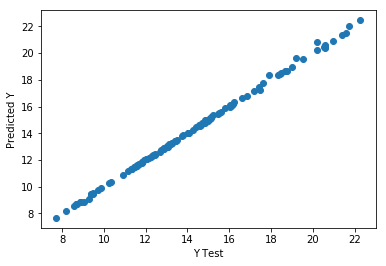

In [17]:
plt.scatter(y_test, y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [18]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.059203214480658815
MSE: 0.012002664078764111
RMSE: 0.1095566706265032


C:\Users\JFP1141\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


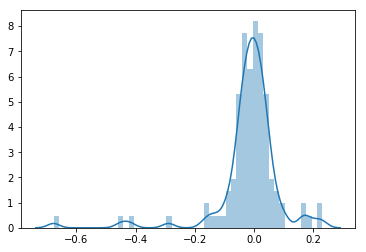

In [19]:
sns.distplot((y_test-y_pred),bins=50);